## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import regex as re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import random

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

!pip install wordcloud
from wordcloud import WordCloud

!pip install spacy
import spacy
from spacy.lang.en import English
import pickle
import gensim
from gensim import corpora

!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=41d50f6673f8aa9f5248f2baf9d0338b17d86e9b48238499ae03790c1c4851fb
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [2]:
import warnings
warnings.filterwarnings("ignore")

## data preprocessing

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CZ4045 NATURAL LANG PROCESSING/Dataset/Cleaned/cleaned_labelled.csv')
df.head()

Mounted at /content/drive


,Original_Text,Cleaned_Text,Lemmatized_Text,Stemmed_Text,Label
0,"""He then went on to tell me about what the US ...",he then went on to tell me about what the us w...,went tell u like back started turn onward form...,went tell us like back start turn onward form ...,0
1,"Im crying, but I know you dont need my tears. ...",im crying but i know you dont need my tears im...,im cry know dont need tear im praying voice re...,im cri know dont need tear im pray voic reach ...,1
2,Most successful first-world countries have alm...,most successful firstworld countries have almo...,successful firstworld country almost completel...,success firstworld countri almost complet ban ...,1
3,Look at Scandinavian countries too. Many have ...,look at scandinavian countries too many have p...,look scandinavian country many permitting requ...,look scandinavian countri mani permit requir b...,-1
4,what an incredibly stale and ignorant take on ...,what an incredibly stale and ignorant take on ...,incredibly stale ignorant take gun violence am...,incred stale ignor take gun violenc america li...,1


In [5]:
df['Subjectivity']=0
df['Polarity']=0
for index, row in df.iterrows():
    if row['Label']==0:
        df.at[index,'Subjectivity'] = 0
        df.at[index,'Polarity']=0
    else:
        df.at[index,'Subjectivity'] = 1
        if row['Label']==-1:
            df.at[index,'Polarity']=0
        else: df.at[index,'Polarity']=1
df.head()

,Original_Text,Cleaned_Text,Lemmatized_Text,Stemmed_Text,Label,Subjectivity,Polarity
0,"""He then went on to tell me about what the US ...",he then went on to tell me about what the us w...,went tell u like back started turn onward form...,went tell us like back start turn onward form ...,0,0,0
1,"Im crying, but I know you dont need my tears. ...",im crying but i know you dont need my tears im...,im cry know dont need tear im praying voice re...,im cri know dont need tear im pray voic reach ...,1,1,1
2,Most successful first-world countries have alm...,most successful firstworld countries have almo...,successful firstworld country almost completel...,success firstworld countri almost complet ban ...,1,1,1
3,Look at Scandinavian countries too. Many have ...,look at scandinavian countries too many have p...,look scandinavian country many permitting requ...,look scandinavian countri mani permit requir b...,-1,1,0
4,what an incredibly stale and ignorant take on ...,what an incredibly stale and ignorant take on ...,incredibly stale ignorant take gun violence am...,incred stale ignor take gun violenc america li...,1,1,1


## K Nearest Neighbors 

> Uses grid search to find out which combination of hyperparameters has a better performance.

In [6]:
def KNNClassification(x_train, x_test, y_train, y_test, preprocessing):
    
    metric = ['euclidean', 'manhattan', 'cosine']
    neighbors = range(1,30)
    leaf_size = range(1,50)
    weight = ['uniform', 'distance']
    param_grid = {'metric' : metric, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}
    
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_
    
    
    knn_model = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], metric= grid_search.best_params_['metric'], leaf_size = grid_search.best_params_['leaf_size'], weights = grid_search.best_params_['weights'])
    knn_model.fit(tweet_matrix, y_train)   
    
    result = knn_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    print("==================================================")
    print("Model: K-Nearest Neighbour Classification")
    print("Best parameters:", grid_search.best_params_)
    print("Preprocessing Function: ", preprocessing)
    print("==================================================")
    print()
    plt.title("Confusion matrix of KNN Classification of tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)

    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    print()
  
    
    # ==================================================
    # 5 fold cross validation 
    # ==================================================
    
    print("--------- 5 fold cross validation ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(cross_val_score(knn_model, test_vector, y_test,scoring = "f1", cv = 5).mean()))
    print('Precision score: {0:0.3f}'.format(cross_val_score(knn_model, test_vector, y_test,scoring = "precision", cv = 5).mean()))
    print('Recall score: {0:0.3f}'.format(cross_val_score(knn_model, test_vector, y_test,scoring = "recall", cv = 5).mean()))
    print()
    

###  KNN Subjectivity Detection

> To find out which vectorizer has a better performance for subjectivity detection.

Model: K-Nearest Neighbour Classification
Best parameters: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Preprocessing Function:  Original_Text



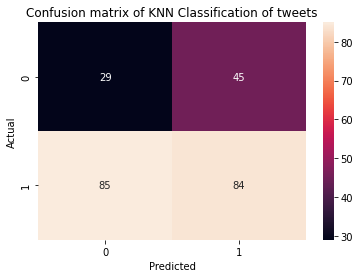

------------ Evaluation Metrics ----------------

F1 score: 0.564
Precision score: 0.651
Recall score: 0.497
Average precision-recall score: 0.673

--------- 5 fold cross validation ----------------

F1 score: 0.811
Precision score: 0.700
Recall score: 0.964



KeyboardInterrupt: ignored

In [7]:
preprocessings = ['Original_Text', 'Cleaned_Text', 'Lemmatized_Text', 'Stemmed_Text'] 
#Count Vectorizer
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Subjectivity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    KNNClassification(x_train, x_test, y_train, y_test, preprocessing)

#TF-IDF
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Subjectivity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    KNNClassification(x_train, x_test, y_train, y_test, preprocessing)

TfidfVectorizer performance is better when detecting subjectivity.

### KNN Polarity Detection

In [ ]:
df = df.loc[df["Subjectivity"] == 1]
df.head()

> Find out which vectorizer has a better performance for polarity detection.

In [ ]:
preprocessings = ['Original_Text', 'Cleaned_Text', 'Lemmatized_Text', 'Stemmed_Text'] 
#Count Vectorizer
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Polarity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    KNNClassification(x_train, x_test, y_train, y_test, preprocessing)

#TF-IDF
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Polarity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    KNNClassification(x_train, x_test, y_train, y_test, preprocessing)

Quite similar on performance.

## Random Forest

In [ ]:
df = pd.read_csv('./cleaned_labelled.csv')
df.head()

In [ ]:
df['Subjectivity']=0
df['Polarity']=0
for index, row in df.iterrows():
    if row['Label']==0:
        df.at[index,'Subjectivity'] = 0
        df.at[index,'Polarity']=0
    else:
        df.at[index,'Subjectivity'] = 1
        if row['Label']==-1:
            df.at[index,'Polarity']=0
        else: df.at[index,'Polarity']=1
df.head()

> Uses grid search to find out which combination of hyperparameters has a better performance.

In [ ]:
def RandomForestClassification(x_train, x_test, y_train, y_test, preprocessing):

    rfc = RandomForestClassifier() 
    
    # Number of trees in random forest
    n_estimators = [100,1000]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt', 'log2']
    # Minimum number of samples required to split a node
    min_samples_split = [1, 2, 5]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}


    grid_search = GridSearchCV(rfc, param_grid, cv= 5)
    grid_search.fit(test_vector, y_test)
    grid_search.best_params_
    
    randomforest_model = RandomForestClassifier(bootstrap = grid_search.best_params_['bootstrap'],
                                                max_features = grid_search.best_params_['max_features'],
                                                n_estimators = grid_search.best_params_['n_estimators'],
                                                min_samples_split = grid_search.best_params_['min_samples_split'],
                                                min_samples_leaf = grid_search.best_params_['min_samples_leaf'])
    randomforest_model.fit(tweet_matrix, y_train)

    result = randomforest_model.predict(test_vector)
    confuse = metrics.confusion_matrix(y_test, result)
    
    
    # ==================================================
    # Confusion Matrix
    # ==================================================
    
    fig = plt.figure()
    sns.heatmap(confuse, annot = True, fmt='d')
    
    
    print("==================================================")
    print("Model: Random Forest Classification")
    print("Preprocessing Function: ", preprocessing)
    print("Best parameters:", grid_search.best_params_)
    print("==================================================")
    print()
    plt.title("Confusion matrix of Random Forest Classification of Tweets")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ==================================================
    # Evaluation Metrics
    # ==================================================
    
    F1_score = metrics.f1_score(y_test, result)
    average_precision = metrics.average_precision_score(y_test, result)
    precision_score= metrics.precision_score(y_test, result)
    recall_score = metrics.recall_score(y_test, result)
    
    print("------------ Evaluation Metrics ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(F1_score))
    print('Precision score: {0:0.3f}'.format(precision_score))
    print('Recall score: {0:0.3f}'.format(recall_score))
    print('Average precision-recall score: {0:0.3f}'.format(average_precision))
    
    
    # ==================================================
    # 5 fold cross validation 
    # ==================================================
    
    print("--------- 5 fold cross validation ----------------")
    print()
    print('F1 score: {0:0.3f}'.format(cross_val_score(randomforest_model, test_vector, y_test,scoring = "f1", cv = 5).mean()))
    print('Precision score: {0:0.3f}'.format(cross_val_score(randomforest_model, test_vector, y_test,scoring = "precision", cv = 5).mean()))
    print('Recall score: {0:0.3f}'.format(cross_val_score(randomforest_model, test_vector, y_test,scoring = "recall", cv = 5).mean()))
    print()

### Random Forest Subjectivity Detection

> Uses TfidVectorizer as the vectorizer.

In [ ]:
preprocessings = ['Original_Text', 'Cleaned_Text', 'Lemmatized_Text', 'Stemmed_Text'] 
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Subjectivity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    RandomForestClassification(x_train, x_test, y_train, y_test, preprocessing)

In [ ]:
preprocessings = ['Original_Text', 'Cleaned_Text', 'Lemmatized_Text', 'Stemmed_Text'] 
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Subjectivity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    RandomForestClassification(x_train, x_test, y_train, y_test, preprocessing)



### Random Forest Polarity Detection

In [ ]:
df = df.loc[df["Subjectivity"] == 1]
df.head()

In [ ]:
preprocessings = ['Original_Text', 'Cleaned_Text', 'Lemmatized_Text', 'Stemmed_Text'] 
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Polarity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    
    vectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    RandomForestClassification(x_train, x_test, y_train, y_test, preprocessing)

In [ ]:
preprocessings = ['Original_Text', 'Cleaned_Text', 'Lemmatized_Text', 'Stemmed_Text'] 
for preprocessing in preprocessings:
    x_train, x_test, y_train, y_test = train_test_split(df[[preprocessing]], 
                                                        df['Polarity'],
                                                        test_size = 0.2, 
                                                        random_state = 24)
    vectorizer = CountVectorizer(ngram_range=(1,2))
    tweet_matrix = vectorizer.fit_transform(x_train[preprocessing])
    test_vector = vectorizer.transform(x_test[preprocessing])
    
    RandomForestClassification(x_train, x_test, y_train, y_test, preprocessing)